<a href="https://colab.research.google.com/github/AnupamaUshetti/Machine-Learning-CW/blob/main/Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning CW/5DATA002W.2 Updated_Coursework_Dataset_1.csv')

In [ ]:
data.head()

,Patient_ID,Month_of_Birth,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,A0012,12,68,T1,0,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24.0,1,60,1.0
1,A0013,12,50,T2,1,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14.0,5,62,1.0
2,A0014,11,58,T3,2,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14.0,7,75,1.0
3,A0015,3,58,T1,0,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2.0,1,84,1.0
4,A0016,1,47,T2,0,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3.0,1,50,1.0


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
print("Dataset shape:", data.shape)
print("Dataset columns:", data.columns)

Dataset shape: (4017, 16)
Dataset columns: Index(['Patient_ID', 'Month_of_Birth', 'Age', 'T_Stage', 'N_Stage',
       '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size',
       'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status'],
      dtype='object')


In [ ]:
print("Target (y) data type:", y.dtype)
print("Unique values in y:", y.unique())

Target (y) data type: float64
Unique values in y: [ 1.  0. nan]


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print("Encoded target labels:", np.unique(y))

Encoded target labels: [0 1 2]


In [ ]:
X = X.apply(LabelEncoder().fit_transform)

print(X.dtypes)
X = X.drop(columns=[X.columns[0]])

Patient_ID                int64
Month_of_Birth            int64
Age                       int64
T_Stage                   int64
N_Stage                   int64
6th_Stage                 int64
Differentiated            int64
Grade                     int64
A_Stage                   int64
Tumor_Size                int64
Estrogen_Status           int64
Progesterone_Status       int64
Regional_Node_Examined    int64
Reginol_Node_Positive     int64
Survival_Months           int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
y = pd.Series(y)

print("Unique values in y:", y.unique())
print("Data type of y:", y.dtype)

Unique values in y: [1 0 2]
Data type of y: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

In [ ]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.47      0.58       162
           1       0.92      0.98      0.95      1037
           2       0.00      0.00      0.00         7

    accuracy                           0.91      1206
   macro avg       0.56      0.48      0.51      1206
weighted avg       0.89      0.91      0.89      1206



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("k-NN Classification Report:\n", classification_report(y_test, y_pred_knn))

k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.33      0.44       162
           1       0.90      0.97      0.93      1037
           2       0.00      0.00      0.00         7

    accuracy                           0.88      1206
   macro avg       0.52      0.43      0.46      1206
weighted avg       0.86      0.88      0.86      1206



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='accuracy')

In [ ]:
print("Best Parameters for k-NN:", grid_search.best_params_)

Best Parameters for k-NN: {'metric': 'euclidean', 'n_neighbors': 10}


In [ ]:
y_pred_knn_best = grid_search.best_estimator_.predict(X_test_scaled)
print("Optimized k-NN Classification Report:\n", classification_report(y_test, y_pred_knn_best))

Optimized k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.33      0.47       162
           1       0.90      0.99      0.94      1037
           2       0.00      0.00      0.00         7

    accuracy                           0.89      1206
   macro avg       0.56      0.44      0.47      1206
weighted avg       0.88      0.89      0.87      1206



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

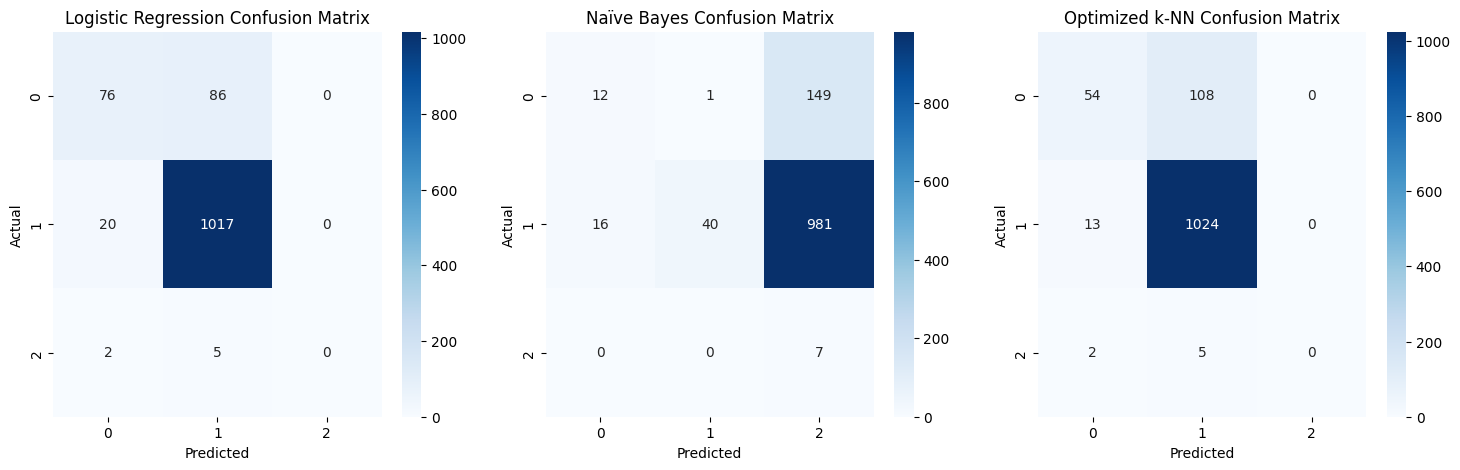

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, (model, pred, title) in enumerate(zip([log_reg, nb, grid_search.best_estimator_],
                                             [y_pred_lr, y_pred_nb, y_pred_knn_best],
                                             ["Logistic Regression", "Naïve Bayes", "Optimized k-NN"])):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[i])
    ax[i].set_title(f'{title} Confusion Matrix')
    ax[i].set_xlabel("Predicted")
    ax[i].set_ylabel("Actual")
plt.show()